# The analysis scripts for Bulk system of fcc Si

## Free energy versus lattice constant

In the file `SUMMARY.fcc`

+ The 1st column: lattice parameter (in Å units)
+ The 2nd column: unit number (always 1 in this case)
+ The 3rd column: free energy (in eV units)
+ The 4th column: initial energy (in eV units)
+ The 5th column: energy change (difference between initial and current energy, in eV units)

In [50]:
# Extract the data for the free energy versus lattice constant

with open('Bulk_fcc_Si/SUMMARY.fcc', 'r') as f:
    lines = f.readlines()

# Initialize the lists for lattice constant and free energy
lattice_list, free_energy_list, initial_energy_list, difference_energy_list = [], [], [], []

# Loop through each line in the file
for line in lines:
    # Check if the line contains the required information
    if 'F=' in line and 'E0=' in line and 'd E =' in line:
        # Extract the lattice constant
        lattice = float(line.split()[0])
        lattice_list.append(lattice)
        # Extract the free energy
        free_energy = float(line.split()[3])
        free_energy_list.append(free_energy)
        # Extract the initial energy
        initial_energy = float(line.split()[5])
        initial_energy_list.append(initial_energy)
        # Extract the energy change
        difference_energy = float(line.split()[8].replace('=',''))
        difference_energy_list.append(difference_energy)

# Print the results
# print('Lattice constant:', lattice_list)
# print('Free energy:', free_energy_list)
# print('Initial energy:', initial_energy_list)
# print('Energy change:', difference_energy_list)


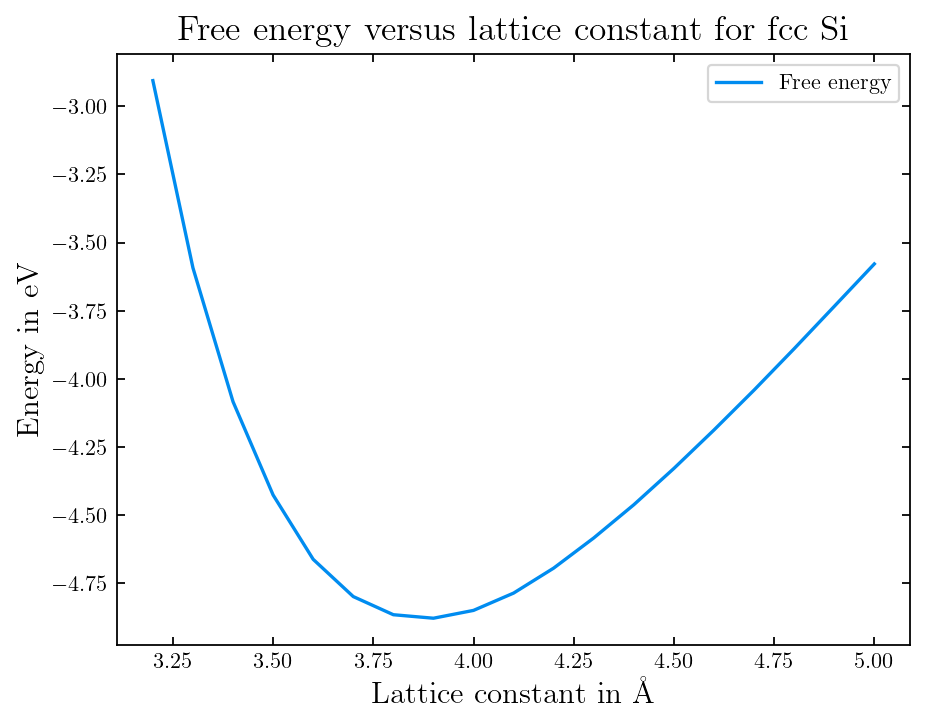

In [51]:
# Plot
import numpy as np
import matplotlib.pyplot as plt

# Set up the specified style parameters
plt.figure(dpi=160, figsize=(6.4,4.8))
params = {"text.usetex": True, "font.family": "serif", "mathtext.fontset": "cm", "axes.titlesize": 16, "axes.labelsize": 14, "figure.facecolor": "w"}
plt.rcParams.update(params)
plt.tick_params(direction="in", which="both", top=True, right=True, bottom=True, left=True)

plt.title("Free energy versus lattice constant for fcc Si"); plt.xlabel(r"Lattice constant in Å"); plt.ylabel(r"Energy in eV")
plt.plot(lattice_list, free_energy_list, c="#008CF0", label="Free energy")
# plt.plot(lattice_list, initial_energy_list, c="#FA9600", label="Initial energy")
# plt.plot(lattice_list, difference_energy_list, c="#8C64F0", label="Energy change")

plt.legend(loc="best")


## Electronic density versus energy


In [52]:
# Import the necessary packages
import xml.etree.ElementTree as ET

# Analysis vasprun.xml file
tree = ET.parse('Bulk_fcc_Si_DOS/vasprun.xml')
root = tree.getroot()

# Extract Fermi energy
efermi = float(root.find(".//i[@name='efermi']").text)

# Extract Energies Total DOS Integrated DOS
energies_list, total_dos_list, integrated_dos_list = [], [], []

for r_element in root.findall(".//set[@comment='spin 1']/r"):
    values = list(map(float, r_element.text.split()))
    energies = values[0]
    energies_list.append(energies)
    total_dos = values[1]
    total_dos_list.append(total_dos)
    integrated_dos = values[2]
    integrated_dos_list.append(integrated_dos)

# print("Fermi energy:", efermi)
# print("Energies:", energies_list)
# print("Total DOS:", total_dos_list)
# print("Integrated DOS:", integrated_dos_list)

# print(efermi)
# print(len(energies_list), energies_list)
# print(len(total_dos_list), total_dos_list)
# print(len(integrated_dos_list), integrated_dos_list)


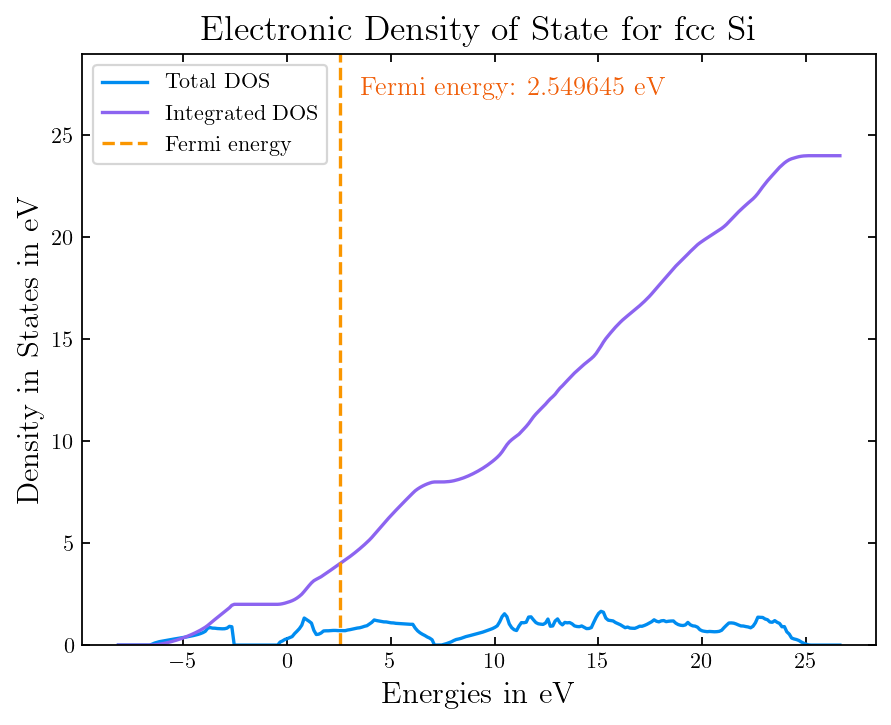

In [53]:
# Plot
import numpy as np
import matplotlib.pyplot as plt

# Set up the specified style parameters
plt.figure(dpi=160, figsize=(6.4,4.8))
params = {"text.usetex": True, "font.family": "serif", "mathtext.fontset": "cm", "axes.titlesize": 16, "axes.labelsize": 14, "figure.facecolor": "w"}
plt.rcParams.update(params)
plt.tick_params(direction="in", which="both", top=True, right=True, bottom=True, left=True)

plt.title("Electronic Density of State for fcc Si"); plt.xlabel(r"Energies in eV"); plt.ylabel(r"Density in States in eV")
plt.plot(energies_list[0:300], total_dos_list[0:300], c="#008CF0", label="Total DOS")
plt.plot(energies_list[0:300], integrated_dos_list[0:300], c="#8C64F0", label="Integrated DOS")
y_axis_top = max(integrated_dos_list[0:300])

# Plot Fermi energy as a vertical line
plt.axvline(x=efermi, linestyle="--", color="#FA9600", label="Fermi energy")

# Add Fermi energy value to the plot
fermi_energy_text = f"Fermi energy: {efermi:.6f} eV"
plt.text(efermi+1, y_axis_top+3, fermi_energy_text, fontsize=12, color="#F05F0A", rotation=0)

plt.ylim(0, y_axis_top+5)
plt.legend(loc="best")
plt.show()


## Bandstructure

The band structure is demonstrated with Energy (in eV) versus K-point distance (in Å).

figure numbers: [1]


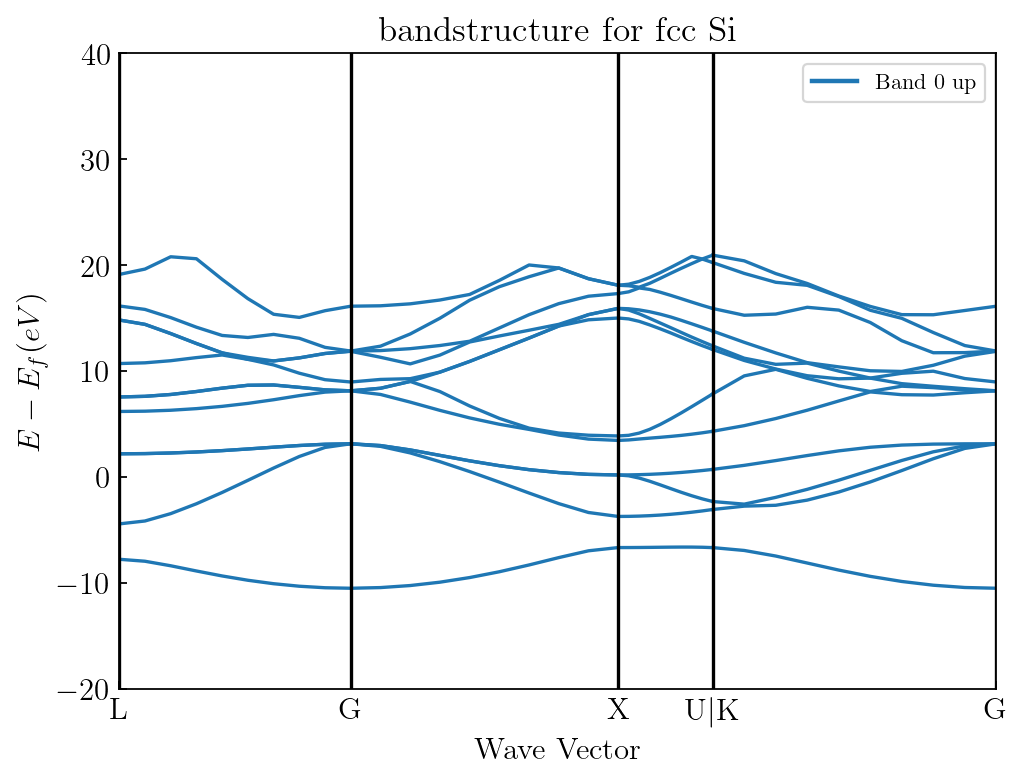

In [66]:
import matplotlib.pyplot as plt
from pymatgen.electronic_structure.plotter import BSPlotter
from pymatgen.io.vasp import Vasprun

# Extract the band structure data from the vasprun.xml file
vasprun = Vasprun("Bulk_fcc_Si_bandstructure/vasprun.xml")
band_structure = vasprun.get_band_structure(line_mode=True) # Save file 

# Use pymatgen's BSPlotter tool to create the band structure plot
plotter = BSPlotter(band_structure)
plotter.get_plot(ylim=(-20, 40))

# print(electronic_structure.bandstructure.BandStructure.bands)

print("figure numbers:",plt.get_fignums())

params = {"text.usetex": True, "font.family": "serif", "mathtext.fontset": "cm", "axes.titlesize": 16, "axes.labelsize": 14, "figure.facecolor": "w"}
plt.rcParams.update(params)

ax = plt.gca()
ax.figure.set_dpi(160)
ax.figure.set_size_inches(6.4,4.8)
ax.set_title("bandstructure for fcc Si",fontsize=params['axes.titlesize'])
ax.set_xlabel('Wave Vector', fontsize=params['axes.labelsize'])
ax.set_ylabel('$E-E_f{\mathrm (eV)}$', fontsize=params['axes.labelsize'])
ax.tick_params(axis='both', labelsize=params['axes.labelsize'],direction='in')

### KPoints reader

For example, there is the k-points file for fcc Si
```
k-points for bandstructure L-G-X-U K-G
    10
line
reciprocal
    0.50000     0.50000     0.50000     L
    0.00000     0.00000     0.00000     G

    0.00000     0.00000     0.00000     G
    0.00000     0.50000     0.50000     X

    0.00000     0.50000     0.50000     X
    0.25000     0.62500     0.62500     U

    0.37500     0.7500      0.37500     K
    0.00000     0.00000     0.00000     G
```

In [55]:
# KPionts reader

def read_kpoints_file(filepath):
    with open(filepath, 'r') as f:
        lines = f.readlines()
        
    num_kpoints = int(lines[1].strip())
    kpoints = []
    labels = []
    
    for i in range(4, 4 + num_kpoints):
        tokens = lines[i].split()
        kpoints.append([float(token) for token in tokens[:3]])
        labels.append(tokens[3].strip() if len(tokens) == 4 else '')
        
    return kpoints, labels

current_kpoints =  read_kpoints_file("Bulk_fcc_Si_bandstructure/KPOINTS")

print(current_kpoints)


([[0.5, 0.5, 0.5], [0.0, 0.0, 0.0], [], [0.0, 0.0, 0.0], [0.0, 0.5, 0.5], [], [0.0, 0.5, 0.5], [0.25, 0.625, 0.625], [], [0.375, 0.75, 0.375]], ['L', 'G', '', 'G', 'X', '', 'X', 'U', '', 'K'])
